In [1]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

folder_path = '/afs/inf.ed.ac.uk/user/s21/s2103701/Desktop/nls-catalogue-published-material_dc'

file_prefix = 'BIBLIOGRAPHIC_11573881650004341_'

file_end = '.xml'

data = pd.DataFrame()

for i in range(1,52):
    curr_file = file_prefix + str(i) + file_end
    file_path = os.path.join(folder_path, curr_file)

    df = pd.read_xml(file_path)

    data = pd.concat([data, df], ignore_index = True)

data

/tmp/ipykernel_592192/3371789552.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,title,creator,type,publisher,date,language,subject,description,coverage,relation,rights,identifier,format
0,Travel /,"Leeson, Edward,1947-2011.",text,London J. Murray,1980,eng,"Short stories, English.",None,None,None,None,None,None
1,Resource book of test items in chemistry,"Jenkins, E. W.(Edgar William)",text,London Murray,1981,eng,Chemistry,Bibliography: p15,None,None,None,None,None
2,Arbitration for contractors,"Stephenson, Douglas A.",text,Northwood Books,1982,,None,None,None,None,None,None,None
3,Armorial bearings of the sovereigns of England...,Standing Conference for Local History.,text,London Bedford Square Press [for the] Standing...,1977,eng,Heraldry,Bibliography: p.29-31,None,None,None,None,None
4,"Sharing caring : caring, equal opportunities a...","Thompson, Catherine.",text,Community Care Project,[1985],,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091422,"Symfoni Nr. 5, Opus 50 = Symphony no. 5, opus ...","Fjeldsøe, Michael.edt",notated music,"Copenhagen : Edition Wilhelm Hansen,",1998.,zxx,Symphonies,"""Critical commentary,"" ""Filiation and evaluati...",None,None,None,None,None
5091423,Music for violin : from 'El Amor brujo' = Musi...,"Falla, Manuel de,1876-1946.Amor brujo.Danza ri...",notated music,"London : Chester Music,",c1996.,zxx,Ballets,Dance of terror (Danza del terror) -- Pantomim...,None,None,None,None,None
5091424,Fox trot ; and Celebration rag : for SATB reco...,"Hilling, Lyndon.",notated music,"London : Theo Wyatt,",c1984.,eng,None,Publ.no.,None,None,None,None,None
5091425,Fieber : Tondichtung : für Tenor und Orcheste...,"Lehár, Franz1870-1948.",notated music,London Glocken Verlag,[1995],ger,None,2827,None,None,None,None,None


# Time Preprocessing

In [2]:
data_year_undefined = data[data.date.isna() == True]

data = data[data.date.isna() == False]

def extract_four_digit_year(value):
    # Check for the presence of 'c', 'ca', or 'circa' at the beginning
    prefix_match = re.match(r'^(c|ca|circa)', str(value), flags=re.IGNORECASE)
    
    # Extract all digits from the value
    digits = re.findall(r'\d', str(value))
    
    # If no digits found or less than 4 digits, return None
    if not digits or len(digits) < 4:
        return None, "unclear uncertainty"
    
    # Join the digits and convert to integer
    year = int(''.join(digits))
    
    # If exactly 4 digits 
    if len(str(year)) == 4 and int(str(year)) > 1000 and int(str(year)) <= 2023:
        if prefix_match:
            return year, "clear uncertainty"
        if '?' in str(value):
            return year, "clear uncertainty"
        if not prefix_match:
            return year, "certainty"
    
    # If more than 4 digits, return the original value with False
    elif len(str(year)) > 4:
        return value, "unclear uncertainty"
    # Otherwise, return None with False
    else:
        return None, "unclear uncertainty"

data['year'], data['certainty'] = zip(*data['date'].apply(extract_four_digit_year))

data = data[data.date.isna() == False]

# retain collections that we are certain about their publication year
data_certain = data[data.certainty == 'certainty']

data_clear_uncertain = data[data.certainty == 'clear uncertainty']


/tmp/ipykernel_592192/482282318.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'], data['certainty'] = zip(*data['date'].apply(extract_four_digit_year))
/tmp/ipykernel_592192/482282318.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'], data['certainty'] = zip(*data['date'].apply(extract_four_digit_year))


# Language Preprocessing

In [3]:
unique_languages = pd.unique(data_certain['language'])

len(unique_languages)

325

In [4]:
uncertain_unique_languages = pd.unique(data_clear_uncertain['language'])

diff = [language for language in uncertain_unique_languages if language not in unique_languages]

diff

['tsn', 'khm', 'mus', 'ng ', 'sem', 'tmh', 'lah', 'kir']

In [5]:
temp = ['eng', '   ', 'rus', 'ger', 'fre', 'swe', 'iri', 'lat', 'nor',
       'dan', 'spa', 'ita', 'ice', 'dut', 'cat', 'und', 'por', 'gla',
       'pol', 'fri', 'grc', 'arm', 'wel', 'chi', 'fro', 'sco', 'ara',
       'bre', 'urd', 'hun', 'tur', 'rum', 'gre', 'hrv', 'heb', 'ang',
       'gle', 'mul', 'jpn', 'ukr', 'slo', 'nya', 'zxx', 'cze', 'som',
       'frm', 'vie', 'mao', 'per', 'lit', 'tah', 'lap', 'roh', 'rom',
       'pro', 'cre', 'kur', 'geo', 'epo', 'pan', 'slv', 'lav', 'yor',
       'her', 'gal', 'lan', 'chu', 'fin', 'nic', 'may', 'afr', 'kin',
       'dum', 'bul', 'ssa', 'suk', 'mol', 'wen', 'xho', 'fao', 'syr',
       'gmh', 'enm', 'hin', 'est', 'swa', 'kor', 'tem', 'ven', 'afa',
       'tog', 'kac', 'cor', 'bem', 'max', 'snd', 'san', 'amh', 'ben',
       'tam', 'esp', 'baq', 'yao', 'cpp', 'scc', 'ijo', 'sla', 'lug',
       'hau', 'fry', 'mac', 'tum', 'esk', 'son', 'sho', 'nub', 'syc',
       'alb', 'gaa', 'ota', 'nep', 'kik', 'snh', 'bel', 'kon', 'sag',
       'mis', 'sso', 'glv', 'sal', 'lao', 'pli', 'ibo', 'guj', 'cop',
       'mar', 'tvl', 'kaa', 'twi', 'nyn', 'loz', 'kua', 'mas', 'glg',
       'ewe', 'mlt', 'srp', 'alg', 'kro', 'btk', 'bas', 'map', 'bur',
       'luo', 'sit', 'ind', 'aze', 'pus', 'mla', 'roa', 'mon', 'akk',
       'haw', 'inc', 'cad', 'kab', 'lun', 'run', 'far', 'yid', 'egy',
       'tha', 'ton', 'mal', 'tib', 'fiu', 'den', 'efi', 'tsi', 'bnt',
       'din', ' en', 'oji', 'nyo', 'nno', 'ach', 'jpr', 'sus', 'tsw',
       'nym', 'fan', 'nzi', 'mlg', 'nah', 'lub', 'men', 'kaz', 'asm',
       'gwi', 'art', 'oci', 'fij', 'lin', 'zul', 'bam', 'tso', 'eth',
       'nau', 'tel', 'nai', 'kam', 'paa', 'pau', 'ath', 'fat', 'niu',
       'hat', 'tut', 'gag', 'tag', 'car', 'non', 'gua', 'jav', None,
       'sai', 'cel', 'wak', 'uzb', 'del', 'sux', 'que', 'int', 'sam',
       'hai', 'alt', 'rar', 'mic', ' ge', 'sna', 'cpf', 'gon', 'ber',
       'elx', 'ng|', 'sin', 'crp', 'dyu', 'kru', 'kas', 'nso', 'chr',
       'ori', 'gil', 'pal', 'bua', 'umb', 'sga', 'osa', 'gez', 'arc',
       'tar', 'ilo', 'ave', 'wol', 'bos', 'cpe', 'kan', 'peo', 'him',
       'got', 'sao', 'iku', 'cho', 'gem', 'tir', 'tgl', 'lam', 'cus',
       'tiv', 'kau', 'goh', 'ful', 'chg', 'ira', 'fur', 'pra', 'iro',
       'lad', 'cam', 'moh', 'ceb', 'er|', 'ada', 'bla', 'nde', 'wal',
       'mkh', 'dua', 'man', 'myn', 'ta|', 'lol', '|en', 'kha', 'd', 'ndo',
       'pag', 'dak', 'ban', 'taj', 'bad', 'nob', 'shn', 'hmn', 'chn',
       'bik', 'sgn', 'ine', 'at|', ' ', 'bal', 'aym', 'khi', 'kpe']

len(temp)

325

32 languages categories that exist in the data but have collections with unclear uncertainty publication years:

' d':  'Unknown', '- N': 'Unknown',  'smi': Sami, 'lus': Lushai, 'kok': 'Konkani', 'scr': 'Croatian, 'wln':'Walloon', 'kom':'Komi', 'tuk':'Turkmen', 'kaw':'Kawi', 'mni':'Manipuri', 'orm':'Oromo', 'fr#':'French', 'kar':'Karen', 'Dra':'Dravidian', 'aar':'Afar', 'aka':'Akan', 'xal':'Kalmyk', 'uig':'Ugihur', 'uga':'Ugaritic', 'udm':'Udmurt', 'zun':'Zuni', 'ido':'Ido', 'gsw':'Swiss German', 'fil':'Filipino', 'bin':'Bini', ''iba':'Iban', 'nap':'Neapolitan', 'ewo':'Ewondo', 'sma':'Southern Sami', '1#e':'English', 'chv':'Chuvash'


In [6]:
language_codes = {'eng': 'English','und': 'Undefined','rus': 'Russian','ger': 'German','fre': 'French','swe': 'Swedish',
'spa': 'Spanish','iri': 'Irish','lat': 'Latin','wel': 'Welsh','nor': 'Norwegian','dan': 'Danish','ita': 'Italian','ice': 'Icelandic',
'dut': 'Dutch','cat': 'Catalan','zxx': 'No linguistic content','pol': 'Polish','por': 'Portuguese','gla': 'Scottish Gaelic','fri': 'Frisian',
'ara': 'Arabic','chi': 'Chinese','fin': 'Finnish','grc': 'Ancient Greek','arm': 'Armenian','fro': 'Old French','sco': 'Scots','bre': 'Breton',
'urd': 'Urdu','hun': 'Hungarian','tur': 'Turkish','rum': 'Romanian','gre': 'Greek','hrv': 'Croatian','heb': 'Hebrew','ang': 'Old English',
'gle': 'Irish','mul': 'Multiple languages','jpn': 'Japanese','ukr': 'Ukrainian','slo': 'Slovak','nya': 'Chinyanja','cze': 'Czech','som': 'Somali',
'frm': 'Middle French','vie': 'Vietnamese','mao': 'Maori','per': 'Persian','ind': 'Indonesian','srp': 'Serbian','lit': 'Lithuanian','tah': 'Tahitian',
'lap': 'Sami','roh': 'Romansh','rom': 'Romany','pro': 'Old Occitan','cre': 'Cree','kur': 'Kurdish','geo': 'Georgian','epo': 'Esperanto','pan': 'Punjabi',
'yor': 'Yoruba','inc': 'Indic','slv': 'Slovenian','lav': 'Latvian','enm': 'Middle English','bul': 'Bulgarian','gal': 'Gaelic','lan': 'Occitan',
'chu': 'Church Slavic','kin': 'Kinyarwanda','nic': 'Niger-Kordofanian','afr': 'Afrikaans','may': 'Malay','dum': 'Middle Dutch',
'ssa': 'Nilo-Saharan','suk': 'Sukuma','nep': 'Nepali','bur': 'Burmese','mol': 'Moldavian','wen': 'Sorbian','xho': 'Xhosa',
'fao': 'Faroese','syr': 'Syriac','gmh': 'Middle High German','bos': 'Bosnian','tha': 'Thai','hin': 'Hindi','est': 'Estonian','swa': 'Swahili',
'aze': 'Azerbaijani','cor': 'Cornish','kor': 'Korean','tem': 'Timne','ven': 'Venda','afa': 'Afro-Asiatic','tog': 'Tonga',
'kac': 'Kachin','bem': 'Bemba','tam': 'Tamil','nob': 'Norwegian Bokmål','max': 'Manx','baq': 'Basque','snd': 'Sindhi',
'san': 'Sanskrit','amh': 'Amharic','ben': 'Bengali','esp': 'Esperanto','yao': 'Yao','cpp': 'Creoles and pidgins','scc': 'Serbo-Croatian',
'ijo': 'Ijo','sla': 'Slavic','lug': 'Ganda','fat': 'Fanti','alb': 'Albanian','hau': 'Hausa','fry': 'Western Frisian','mac': 'Macedonian',
'tum': 'Tumbuka','esk': 'Eskimo-Aleut','son': 'Songhai','lad': 'Ladino','mis': 'Miscellaneous languages','sho': 'Shona','nub': 'Nubian',
'syc': 'Classical Syriac','gaa': 'Ga','ota': 'Ottoman Turkish','haw': 'Hawaiian','kik': 'Kikuyu','jav': 'Javanese','snh': 'Shona','bel': 'Belarusian',
'kon': 'Kongo','sag': 'Sango','sso': 'Sotho, Southern','guj': 'Gujarati','glv': 'Manx','cpe': 'Creoles and pidgins, English-based','sal': 'Salishan',
'hat': 'Haitian Creole','map': 'Austronesian','glg': 'Galician','lao': 'Lao','pli': 'Pali','ibo': 'Igbo','nno': 'Norwegian Nynorsk',
'cop': 'Coptic','mar': 'Marathi','tvl': 'Tuvaluan','kaa': 'Kara-Kalpak','twi': 'Twi','nyn': 'Norwegian Nynorsk','loz': 'Lozi','kua': 'Kuanyama',
'mas': 'Masai','ewe': 'Ewe','mlt': 'Maltese','pus': 'Pushto','alg': 'Algonquian','kro': 'Kru','sin': 'Sinhala','btk': 'Batak',
'gem': 'Germanic','bas': 'Basa','luo': 'Luo (Kenya and Tanzania)','sit': 'Sino-Tibetan','dak': 'Dakota','tag': 'Tagalog',
'mla': 'Malayalam','roa': 'Romance','mon': 'Mongolian','nde': 'Ndebele, North','yid': 'Yiddish','akk': 'Akkadian',
'cad': 'Caddo','kab': 'Kabyle','lun': 'Lunda','run': 'Rundi','mal': 'Malayalam','tib': 'Tibetan','far': 'Farsi','egy': 'Egyptian (Ancient)',
'myn': 'Mayan','ton': 'Tonga','fiu': 'Finno-Ugrian','den': 'Slave (Athapascan)',
'efi': 'Efik','tsi': 'Tsimshian','bnt': 'Bantu','din': 'Dinka','oji': 'Ojibwa','zul': 'Zulu','uzb': 'Uzbek','nyo': 'Nyoro',
'sgn': 'Sign languages','ach': 'Acholi','jpr': 'Judeo-Persian','sus': 'Susu','tsw': 'Tswana','nym': 'Nyamwezi','kan': 'Kannada',
'fan': 'Fang','nzi': 'Nzima','mlg': 'Malagasy','nah': 'Nahuatl','lub': 'Luba-Katanga','men': 'Mende','kaz': 'Kazakh',
'asm': 'Assamese','gwi': "Gwich'in",'art': 'Artificial languages','oci': 'Occitan (post 1500)','fij': 'Fijian','lin': 'Lingala',
'bam': 'Bambara','tso': 'Tsonga','eth': 'Ethiopian','nau': 'Nauru','tel': 'Telugu','nai': 'North American Indian','kam': 'Kamba',
'paa': 'Papuan','pau': 'Palauan','ath': 'Athapascan','tir': 'Tigrinya','niu': 'Niuean','tut': 'Altaic',
'gag': 'Gallegan','car': 'Carib','non': 'Old Norse','iro': 'Iroquoian','gua': 'Guaraní','sai': 'South American Indian',
'cel': 'Celtic','wak': 'Wakashan','arc': 'Official Aramaic (700-300 BCE)','del': 'Delaware','sux': 'Sumerian','que': 'Quechua',
'int': 'Interlingua','sam': 'Samaritan Aramaic','hai': 'Haida','alt': 'Southern Altai','rar': 'Rarotongan','mic': 'Micmac',
' ge': 'Georgian','sna': 'Shona','cpf':'Creoles and pidgins, French-based','gon': 'Gondi','ber': 'Berber','elx': 'Elamite',
'ng|': 'Unknown','crp': 'Creoles and pidgins','dyu': 'Dyula','kru': 'Kurukh','man': 'Mandingo','kas': 'Kashmiri','nso': 'Pedi','chr': 'Cherokee','ori': 'Oriya',
'gil': 'Gilbertese','pal': 'Pahlavi','bua': 'Buriat','umb': 'Umbundu','sga': 'Old Irish','tgl': 'Tagalog',
'osa': 'Osage','gez': 'Geez','tar': 'Tatar','ilo': 'Iloko','ave': 'Avestan','wol': 'Wolof',
'peo': 'Old Persian','ine': 'Indo-European','him': 'Western Pahari','got': 'Gothic','sao': 'Sao','ira': 'Iranian',
'iku': 'Inuktitut','cho': 'Choctaw','lam': 'Lamba','cus': 'Cushitic','tiv': 'Tiv','kau': 'Kanuri',
'goh': 'Old High German','ful': 'Fulah','ada': 'Adangme','chg': 'Chagatai','fur': 'Friulian','pra': 'Prakrit',
'cam': 'Khmer','moh': 'Mohawk','ceb': 'Cebuano','er|': 'Unknown','bla': 'Siksika',
'wal': 'Walamo','mkh': 'Mon-Khmer','dua': 'Duala','ta|': 'Tamil','lol': 'Mongo',
'|en': 'English','kha': 'Khasi','ndo': 'Ndonga','pag': 'Pangasinan',
'ban': 'Balinese','taj': 'Tajik','aym': 'Aymara','bad': 'Banda','shn': 'Shan',
'hmn': 'Hmong','chn': 'Chinook jargon','bik': 'Bikol','at|': 'Austroasiatic',
' ': 'Unknown','bal': 'Baluchi','khi': 'Khoisan','kpe': 'Kpelle',
'her': 'Herero',  '   ': 'Unknown', ' en': 'English','d': 'Unknown', 
'tsn':'Tswana', 'khm':'Khmer', 'mus':'Creek', 'ng ': 'Unknown', 'sem':'Semitic', 'tmh':'Tamashek', 'lah':'Lahnda', 'kir':'Kirghiz'              
}

data_certain['language'] = data_certain['language'].map(language_codes)

data_clear_uncertain['language'] = data_clear_uncertain['language'].map(language_codes) 


/tmp/ipykernel_592192/1004620075.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_certain['language'] = data_certain['language'].map(language_codes)
/tmp/ipykernel_592192/1004620075.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clear_uncertain['language'] = data_clear_uncertain['language'].map(language_codes)


In [7]:
europe= ["English", "Russian", "German", "French", "Swedish", "Spanish", "Irish", "Latin", "Welsh", "Norwegian", "Danish", "Italian", 
         "Icelandic", "Dutch", "Catalan", "Polish", "Portuguese", "Scottish Gaelic", "Frisian", "Finnish", "Ancient Greek", "Old French", 
         "Scots", "Breton", "Hungarian", "Romanian", "Greek", "Croatian", "Old English", "Ukrainian", "Slovak", "Czech", "Middle French", 
         "Serbian", "Lithuanian", "Romansh", "Old Occitan", "Georgian",  "Slovenian", "Latvian", "Middle English", "Bulgarian", 
         "Occitan", "Church Slavic", "Middle Dutch", "Moldavian", "Sorbian", "Faroese", "Middle High German", "Bosnian", "Estonian", 
         "Cornish", "Norwegian Bokmål", "Amex", "Sami", "Basque", "Serbo-Croatian", "Albanian", "Western Frisian", "Macedonian", "Ladino", "Belarusian", 
         "Galician", "Norwegian Nynorsk", "Germanic", "Romance", "Yiddish", "Wallow", "Finno-Ugrian", "Gallegan", "Old Norse", "Old Irish", "Gothic",
         "Sao", "Old High German", "Fruition", "Celtic"]


asia = ["Arabic", "Chinese", "Armenian", "Urdu",  "Turkish", "Hebrew", "Japanese", "Vietnamese", "Persian", "Indonesian", "Kurdish", "Punjabi",
        "Indic", "Malay", "Nepali", "Burmese", "Syriac", "Thai", "Hindi", "Azerbaijani", "Korean", "Kachin", "Tamil", "Sindhi", "Sanskrit", 
        "Bengali", "Classical Syriac", "Ottoman Turkish", "Javanese", "Austronesian", "Lao", "Pali", "Marathi", "Kara-Kalpak", 
        "Maltese", "Pushto", "Sinhala", "Batak", "Sino-Tibetan", "Tagalog", "Malayalam", "Mongolian", "Akkadian", "Tibetan", "Farsi",
        "Uzbek", "Judeo-Persian", "Kannada", "Nahuatil", "Kazakh", "Assamese", "Telugu", "Altaic", "Khmer", 
        "Official Aramaic (700-300 BCE)", "Sumerian", "Samaritan Aramaic", "Southern Altai", "Gondi", "Elamite", "Pahlavi", "Kashmiri", "Oriya", 
         "Kirghiz", "Bruita", "Tartar", "Ilo", "Avestan", "Old Persian", "Western Pahari", "Iranian", 
        "Chagatai",  "Prakrit", "Cebuano", "Mon-Khmer", "Semitic", "Khasi", "Pangasinan", "Balinese", 
        "Tajik", "Shan", "Hmong", "Bikol", "Lahnda", "Baluchi", "Austroasiatic"]


africa = ["Chinyanja", "Somali", "Yoruba","Kinyarwanda", "Niger-Kordofanian", "Afrikkans", "Nilo-Saharan", "Suzuka", "Xhosa", "Swahili", "Timne",
          "Venda",  "Bemba", "Amharic", "Yao", "Ijo", "Ganda", "Fanti", "Hausa", "Tumbuka", "Songhai", "Shona", 
          "Nubian", "Ga", "Kikuyu", "Kongo", "Sango", "Sotho, Southern", "Gujarati", "Coptic", "Twi", "Lozi", "Kuanyama", "Ewe", "Kru", "Basa",
          "Luo", "Ndebele, North", "Kabyle", "Lunda", "Rundi", "Egyptian (Ancient)", "Efik", "Bantu", "Dinka", "Zulu", "Nyoro", "Acholi", "Susu",
          "Tswana", "Nyamwezi", "Fang", "Nzima", "Malagasy", "Luba-Katanga", "Mende", "Lingala", "Bambara", "Tsonga", "Ethiopian", "Kamba", 
          "Tigrinya", "Berber", "Dyula", "Kurukh", "Mandingo", "Pedi", "Umbundu", "Geez", "Igbo", "Wolof", "Cushitic", 
          "Tiv", "Kanuri", "Fulah", "Adangme", "Walamo", "Duala", "Mongo", "Ndonga", "Tamashek", "Banda", "Khoisan", "Knell", 'Herero' 
          ] 



north_america = ["Cree", "Eskimo-Aleut", "Hawaiian", "Salishan", "Haitian Creole", "Algonquian", "Dakota", "Caddo", "Mayan", "Slave (Athapascan)",
                 "Tsimshian", "Ojibwa", "Gwich’in", "North American Indian", "Athapaskan", "Iroquoian", "Wakashan", "Delaware", "Haida", "Micmac",
                 "Cherokee", "Osage", "Inuktitut", "Choctaw", "Mohawk", "Siksika", "Chinook Jargon", "Creek"]


south_america = ["Carib", "Guaraní", "South American Indian", "Quechua", "Aymara"] 


oceania = ["Maori", "Tahitian,Tonga", "Tuvaluan", "Fijian", "Nauru", "Papuan", "Palauan",  "Niuean", "Rarotonga", "Gilbertese"] 


unknown = ["Unknown","Undefined", "No linguistic content", "Multiple languages","Romany", "Esperanto", "Afro-Asiatic", "Creoles and pidgins",
           "Miscellaneous Languages", "Creoles and pidgins, English-based", "Sign languages", "Artificial languages", "Interlingua", 
           "Creoles and pidgins, French-based", "Indo-European", "Lamba"] 

print(len(set(europe)))
print(len(set(asia)))
print(len(set(africa)))
print(len(set(north_america)))
print(len(set(oceania)))
print(len(set(south_america)))
print(len(set(unknown)))

77
86
85
28
10
5
16


In [8]:
def assign_continent(language):
    if language in europe:
        return "Europe"
    elif language in asia:
        return "Asia"
    elif language in africa:
        return "Africa"
    elif language in north_america:
        return "North America"
    elif language in oceania:
        return "Oceania"
    elif language in unknown or language is np.NaN:
        return "Unknown"
    elif language in south_america:
        return "South America"

data_certain['continent'] = data_certain['language'].apply(assign_continent)

data_certain

/tmp/ipykernel_592192/311654166.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_certain['continent'] = data_certain['language'].apply(assign_continent)


,title,creator,type,publisher,date,language,subject,description,coverage,relation,rights,identifier,format,year,certainty,continent
0,Travel /,"Leeson, Edward,1947-2011.",text,London J. Murray,1980,English,"Short stories, English.",None,None,None,None,None,None,1980,certainty,Europe
1,Resource book of test items in chemistry,"Jenkins, E. W.(Edgar William)",text,London Murray,1981,English,Chemistry,Bibliography: p15,None,None,None,None,None,1981,certainty,Europe
2,Arbitration for contractors,"Stephenson, Douglas A.",text,Northwood Books,1982,Unknown,None,None,None,None,None,None,None,1982,certainty,Unknown
3,Armorial bearings of the sovereigns of England...,Standing Conference for Local History.,text,London Bedford Square Press [for the] Standing...,1977,English,Heraldry,Bibliography: p.29-31,None,None,None,None,None,1977,certainty,Europe
4,"Sharing caring : caring, equal opportunities a...","Thompson, Catherine.",text,Community Care Project,[1985],Unknown,None,None,None,None,None,None,None,1985,certainty,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091405,"Lauda SionPraise, O Zion for four-part chorus ...",ThomasAquinasSaint1225?-1274.,notated music,[New York] Lawson-Gould Music Publishers,[1986],Latin,None,Publ. no.,None,None,None,None,None,1986,certainty,Europe
5091412,"Rock school : graded solo exams in rock, jazz ...","York, Norton.",notated music,"London : Faber Music,",1995.,No linguistic content,None,None,None,None,None,None,None,1995,certainty,Unknown
5091417,"Drei Romanzen = Three romances : op. 21, für ...","Draheim, Joachim.",notated music,"Wiesbaden : Breitkopf & Härtel,",[1996].,No linguistic content,Romances (Music),"Includes ""Revisionsbericht.""",None,None,None,None,None,1996,certainty,Unknown
5091422,"Symfoni Nr. 5, Opus 50 = Symphony no. 5, opus ...","Fjeldsøe, Michael.edt",notated music,"Copenhagen : Edition Wilhelm Hansen,",1998.,No linguistic content,Symphonies,"""Critical commentary,"" ""Filiation and evaluati...",None,None,None,None,None,1998,certainty,Unknown


In [9]:
data_clear_uncertain['continent'] = data_clear_uncertain['language'].apply(assign_continent)

data_clear_uncertain['continent']

/tmp/ipykernel_592192/4185932392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clear_uncertain['continent'] = data_clear_uncertain['language'].apply(assign_continent)


12          Europe
19          Europe
33          Europe
36          Europe
37          Europe
            ...   
5091420    Unknown
5091421    Unknown
5091423    Unknown
5091424     Europe
5091426    Unknown
Name: continent, Length: 571000, dtype: object

In [10]:
# Return the total number of collections for each continent of every 50 years
def count_collections(d):
    small_data = d[['type','language','continent','year','certainty']]


    collections = []

    for gap in range(1450, 2050, 50):
        europe_collection = small_data[(small_data.continent == 'Europe') & (small_data.year > gap) & (small_data.year <= gap + 50)]
        asia_collection = small_data[(small_data.continent == 'Asia') & (small_data.year > gap) & (small_data.year <= gap + 50)]
        africa_collection = small_data[(small_data.continent == 'Africa') & (small_data.year > gap) & (small_data.year <= gap + 50)]
        north_america_collection = small_data[(small_data.continent == 'North America') & (small_data.year > gap) & (small_data.year <= gap + 50)]
        oceania_collection = small_data[(small_data.continent == 'Oceania') & (small_data.year > gap) & (small_data.year <= gap + 50)]
        south_america_collection = small_data[(small_data.continent == 'South America') & (small_data.year > gap) & (small_data.year <= gap + 50)]
        unknown_collection = small_data[(small_data.continent == 'Unknown') & (small_data.year > gap) & (small_data.year <= gap + 50)]

        collections.append([len(europe_collection), len(unknown_collection), len(asia_collection), len(africa_collection), len(north_america_collection),
                        len(oceania_collection), len(south_america_collection)])
    collections = np.array(collections)



    collections[0] = np.array(collections[0])

    for i in range(len(collections)-1):
        collections[i+1] = collections[i] + collections[i+1]
    
    return collections

certain_collections = count_collections(data_certain)
clear_uncertain_collections = count_collections(data_clear_uncertain)

In [11]:
# collections[0] = np.array(collections[0])

# for i in range(len(collections)-1):
#     collections[i+1] = collections[i] + collections[i+1]

# collections
clear_uncertain_collections

array([[    69,      0,      0,      0,      0,      0,      0],
       [   286,      3,      0,      0,      0,      0,      0],
       [   616,      4,      6,      0,      0,      0,      0],
       [   983,      4,      6,      0,      0,      0,      0],
       [  2763,      5,      6,      0,      0,      0,      0],
       [  9317,     12,      9,      0,      0,      0,      0],
       [ 23790,     28,     13,      0,      0,      0,      0],
       [ 29024,    185,     16,      0,      0,      0,      0],
       [ 37815,    566,     25,      3,      1,      0,      0],
       [ 44905,   1186,     41,      4,      1,      0,      0],
       [363929,  14232,    485,     58,      3,      0,      1],
       [551403,  18572,    882,    113,      6,      0,      1]])

In [12]:
total_collections = certain_collections + clear_uncertain_collections

# Draft Stacked Area Chart

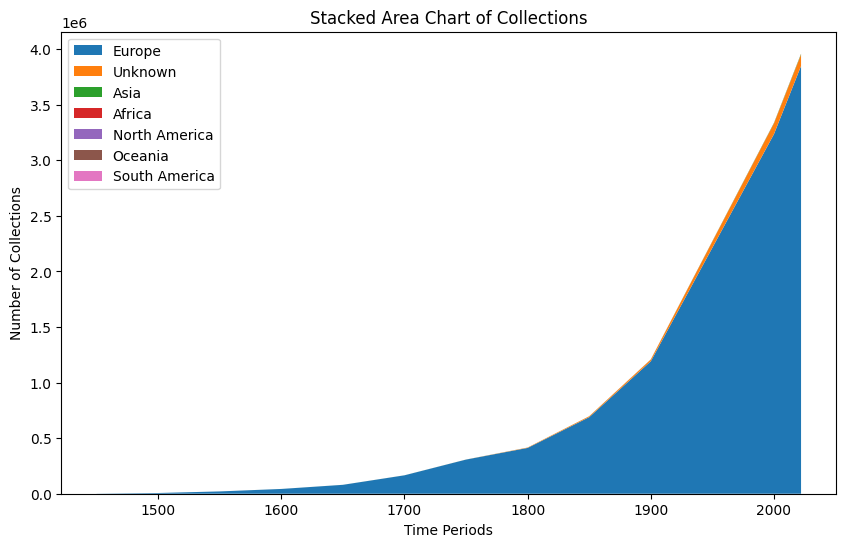

In [13]:
# Your data array
total_collections = np.array([
    [657, 0, 0, 0, 0, 0, 0],
    [6414, 19, 23, 1, 0, 0, 0],
    [20700, 49, 56, 1, 0, 0, 0],
    [42849, 82, 100, 1, 0, 0, 0],
    [80006, 122, 132, 1, 3, 0, 0],
    [165539, 193, 178, 3, 3, 0, 0],
    [307167, 322, 210, 4, 13, 0, 0],
    [412064, 3200, 301, 21, 35, 1, 1],
    [688820, 7461, 562, 257, 73, 22, 6],
    [1191559, 15080, 832, 722, 95, 36, 10],
    [3234756, 96398, 3505, 1372, 113, 54, 16],
    [3848237, 102421, 5780, 1500, 118, 55, 16]
])

# Define the time periods or categories
time_periods = [1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,2000,2022]

# Optional: Define custom colors for each stack
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create the plot
plt.figure(figsize=(10, 6))
plt.stackplot(time_periods, total_collections.T, labels=['Europe', 'Unknown', 'Asia', 'Africa', 'North America', 'Oceania', 'South America'], colors=colors)
plt.legend(loc='upper left')
plt.title('Stacked Area Chart of Collections')
plt.xlabel('Time Periods')
plt.ylabel('Number of Collections')
plt.savefig("unsuccessful_stacked_chart.png")
plt.show()

# Stacked Area Chart

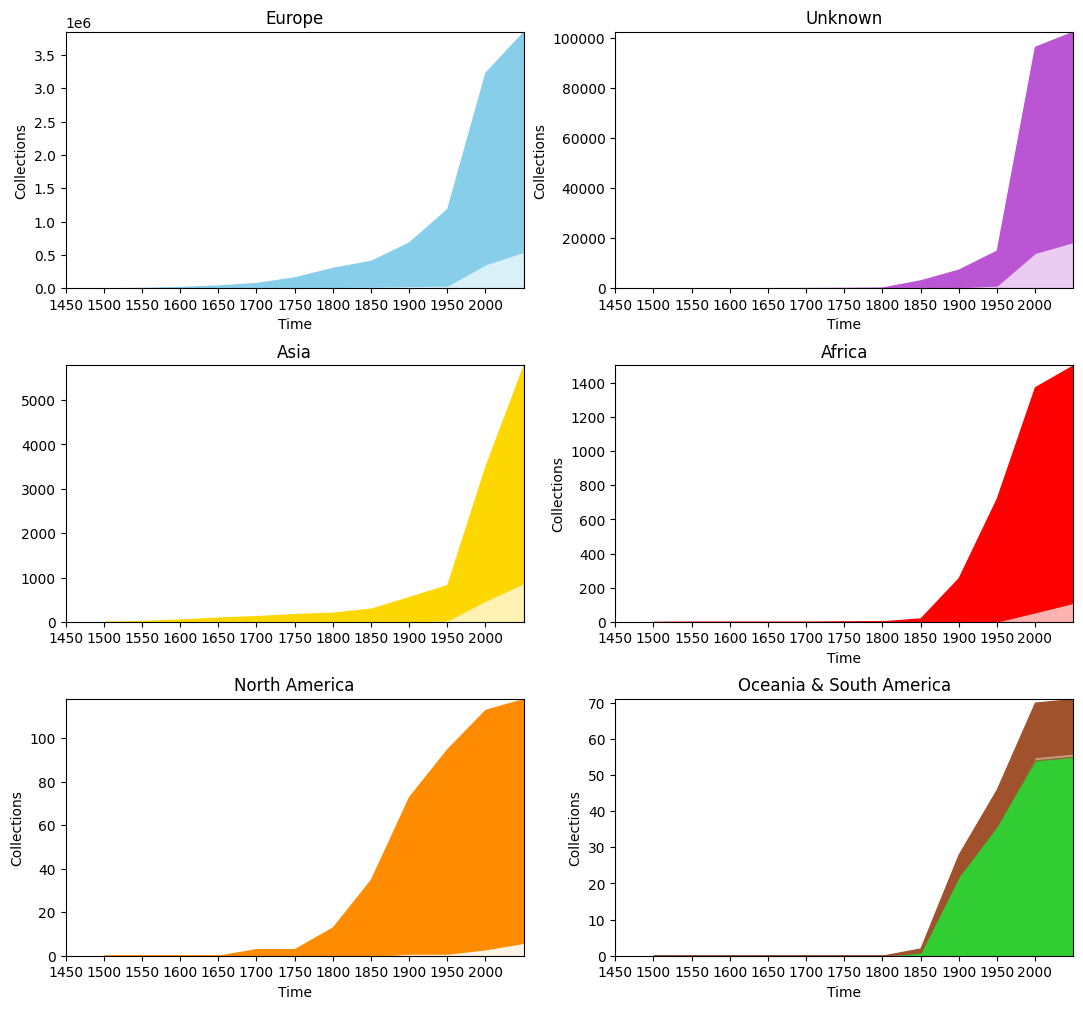

In [14]:
import matplotlib.patches as mpatches

def plot_stack_plots(collections_one, collections_two, title = None):
    resultant_collections = collections_one + collections_two
    
    time = [1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000,2050]
    
    fig, axes = plt.subplots(3, 2, figsize=(13, 12))
    
    # axes[0,0].stackplot(time, collections[:,0], color = 'skyblue')
    axes[0,0].set_xlim(1450, 2050)
    axes[0,0].set_xticks(range(1450,2050,50))
    axes[0,0].set_ylim(0, np.max(resultant_collections[:,0]))
    axes[0,0].fill_between(time, 0, collections_two[:,0], color='skyblue', alpha = 0.3)
    axes[0,0].fill_between(time, collections_two[:,0], collections_two[:,0] + collections_one[:,0], color='skyblue')
    axes[0,0].set_title('Europe')
    axes[0,0].set_xlabel('Time')
    axes[0,0].set_ylabel('Collections')
    

    axes[0,1].set_xlim(1450,2050)
    axes[0,1].set_xticks(range(1450,2050,50))
    axes[0,1].fill_between(time, 0, collections_two[:,1], color='mediumorchid', alpha=0.3)
    axes[0,1].fill_between(time, collections_two[:,1], collections_two[:,1] + collections_one[:,1], color='mediumorchid')
    axes[0,1].set_ylim(0, np.max(resultant_collections[:,1]))
    axes[0,1].set_title('Unknown')
    axes[0,1].set_xlabel('Time')
    axes[0,1].set_ylabel('Collections')
    
    axes[1,0].set_xlim(1450,2050)
    axes[1,0].set_xticks(range(1450,2050,50))
    axes[1,0].fill_between(time, 0, collections_two[:,2], color='gold', alpha=0.3)
    axes[1,0].fill_between(time, collections_two[:,2], collections_two[:,2] + collections_one[:,2], color='gold')
    axes[1,0].set_ylim(0, np.max(resultant_collections[:,2]))
    axes[1,0].set_title('Asia')
    axes[0,1].set_xlabel('Time')
    axes[0,1].set_ylabel('Collections')


    axes[1,1].set_xlim(1450,2050)
    axes[1,1].set_xticks(range(1450,2050,50))
    axes[1,1].fill_between(time, 0, collections_two[:,3], color='red', alpha=0.3)
    axes[1,1].fill_between(time, collections_two[:,3], collections_two[:,3] + collections_one[:,3], color='red')
    axes[1,1].set_ylim(0, np.max(resultant_collections[:,3]))
    axes[1,1].set_title('Africa')
    axes[1,1].set_xlabel('Time')
    axes[1,1].set_ylabel('Collections')


    axes[2,0].set_xlim(1450,2050)
    axes[2,0].set_xticks(range(1450,2050,50))
    axes[2,0].fill_between(time, 0, collections_two[:,4], color='darkorange', alpha=0.1)
    axes[2,0].fill_between(time, collections_two[:,4], collections_two[:,4] + collections_one[:,4], color='darkorange')
    axes[2,0].set_ylim(0, np.max(resultant_collections[:,4]))
    axes[2,0].set_title('North America')
    axes[2,0].set_xlabel('Time')
    axes[2,0].set_ylabel('Collections')


    axes[2,1].set_xlim(1450,2050)
    axes[2,1].set_xticks(range(1450,2050,50))
    axes[2,1].fill_between(time, 0, collections_two[:,5], color='limegreen', alpha=0.1)
    axes[2,1].fill_between(time, collections_two[:,5], collections_two[:,5] + collections_one[:,5], color='limegreen')
    axes[2,1].fill_between(time, collections_two[:,5] + collections_one[:,5], 
                           collections_two[:,5] + collections_one[:,5] + collections_two[:,6], color='sienna', alpha=0.6)
    axes[2,1].fill_between(time, collections_two[:,5] + collections_one[:,5] + collections_two[:,6], 
                           collections_two[:,5] + collections_one[:,5] + collections_two[:,6] + collections_one[:,6], color='sienna')
    axes[2,1].set_ylim(0, np.max(np.sum(resultant_collections[:,5:7],axis=1)))
    # legend_labels = {'aqua': 'Oceania','limegreen': 'South America'}
    # legend_patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
    # axes[2,1].legend(handles=legend_patches, loc='upper left', ncol=1, fontsize='small')
    axes[2,1].set_title('Oceania & South America')
    axes[2,1].set_xlabel('Time')
    axes[2,1].set_ylabel('Collections')
    
    # fig.suptitle(title, fontsize=15)
    fig.subplots_adjust(hspace=0.3)
    plt.xlabel('Time')
    plt.ylabel('Collections')
    plt.savefig("stacked_chart.png")
    plt.show()

plot_stack_plots(certain_collections, clear_uncertain_collections, "Change of Linguistic Collections by Continent over Time")

In [15]:
# plot_stack_plots(clear_uncertain_collections, "Temporal Distribution of Linguistic Collections with Unclear Publication Time by Continent")

# Treemap

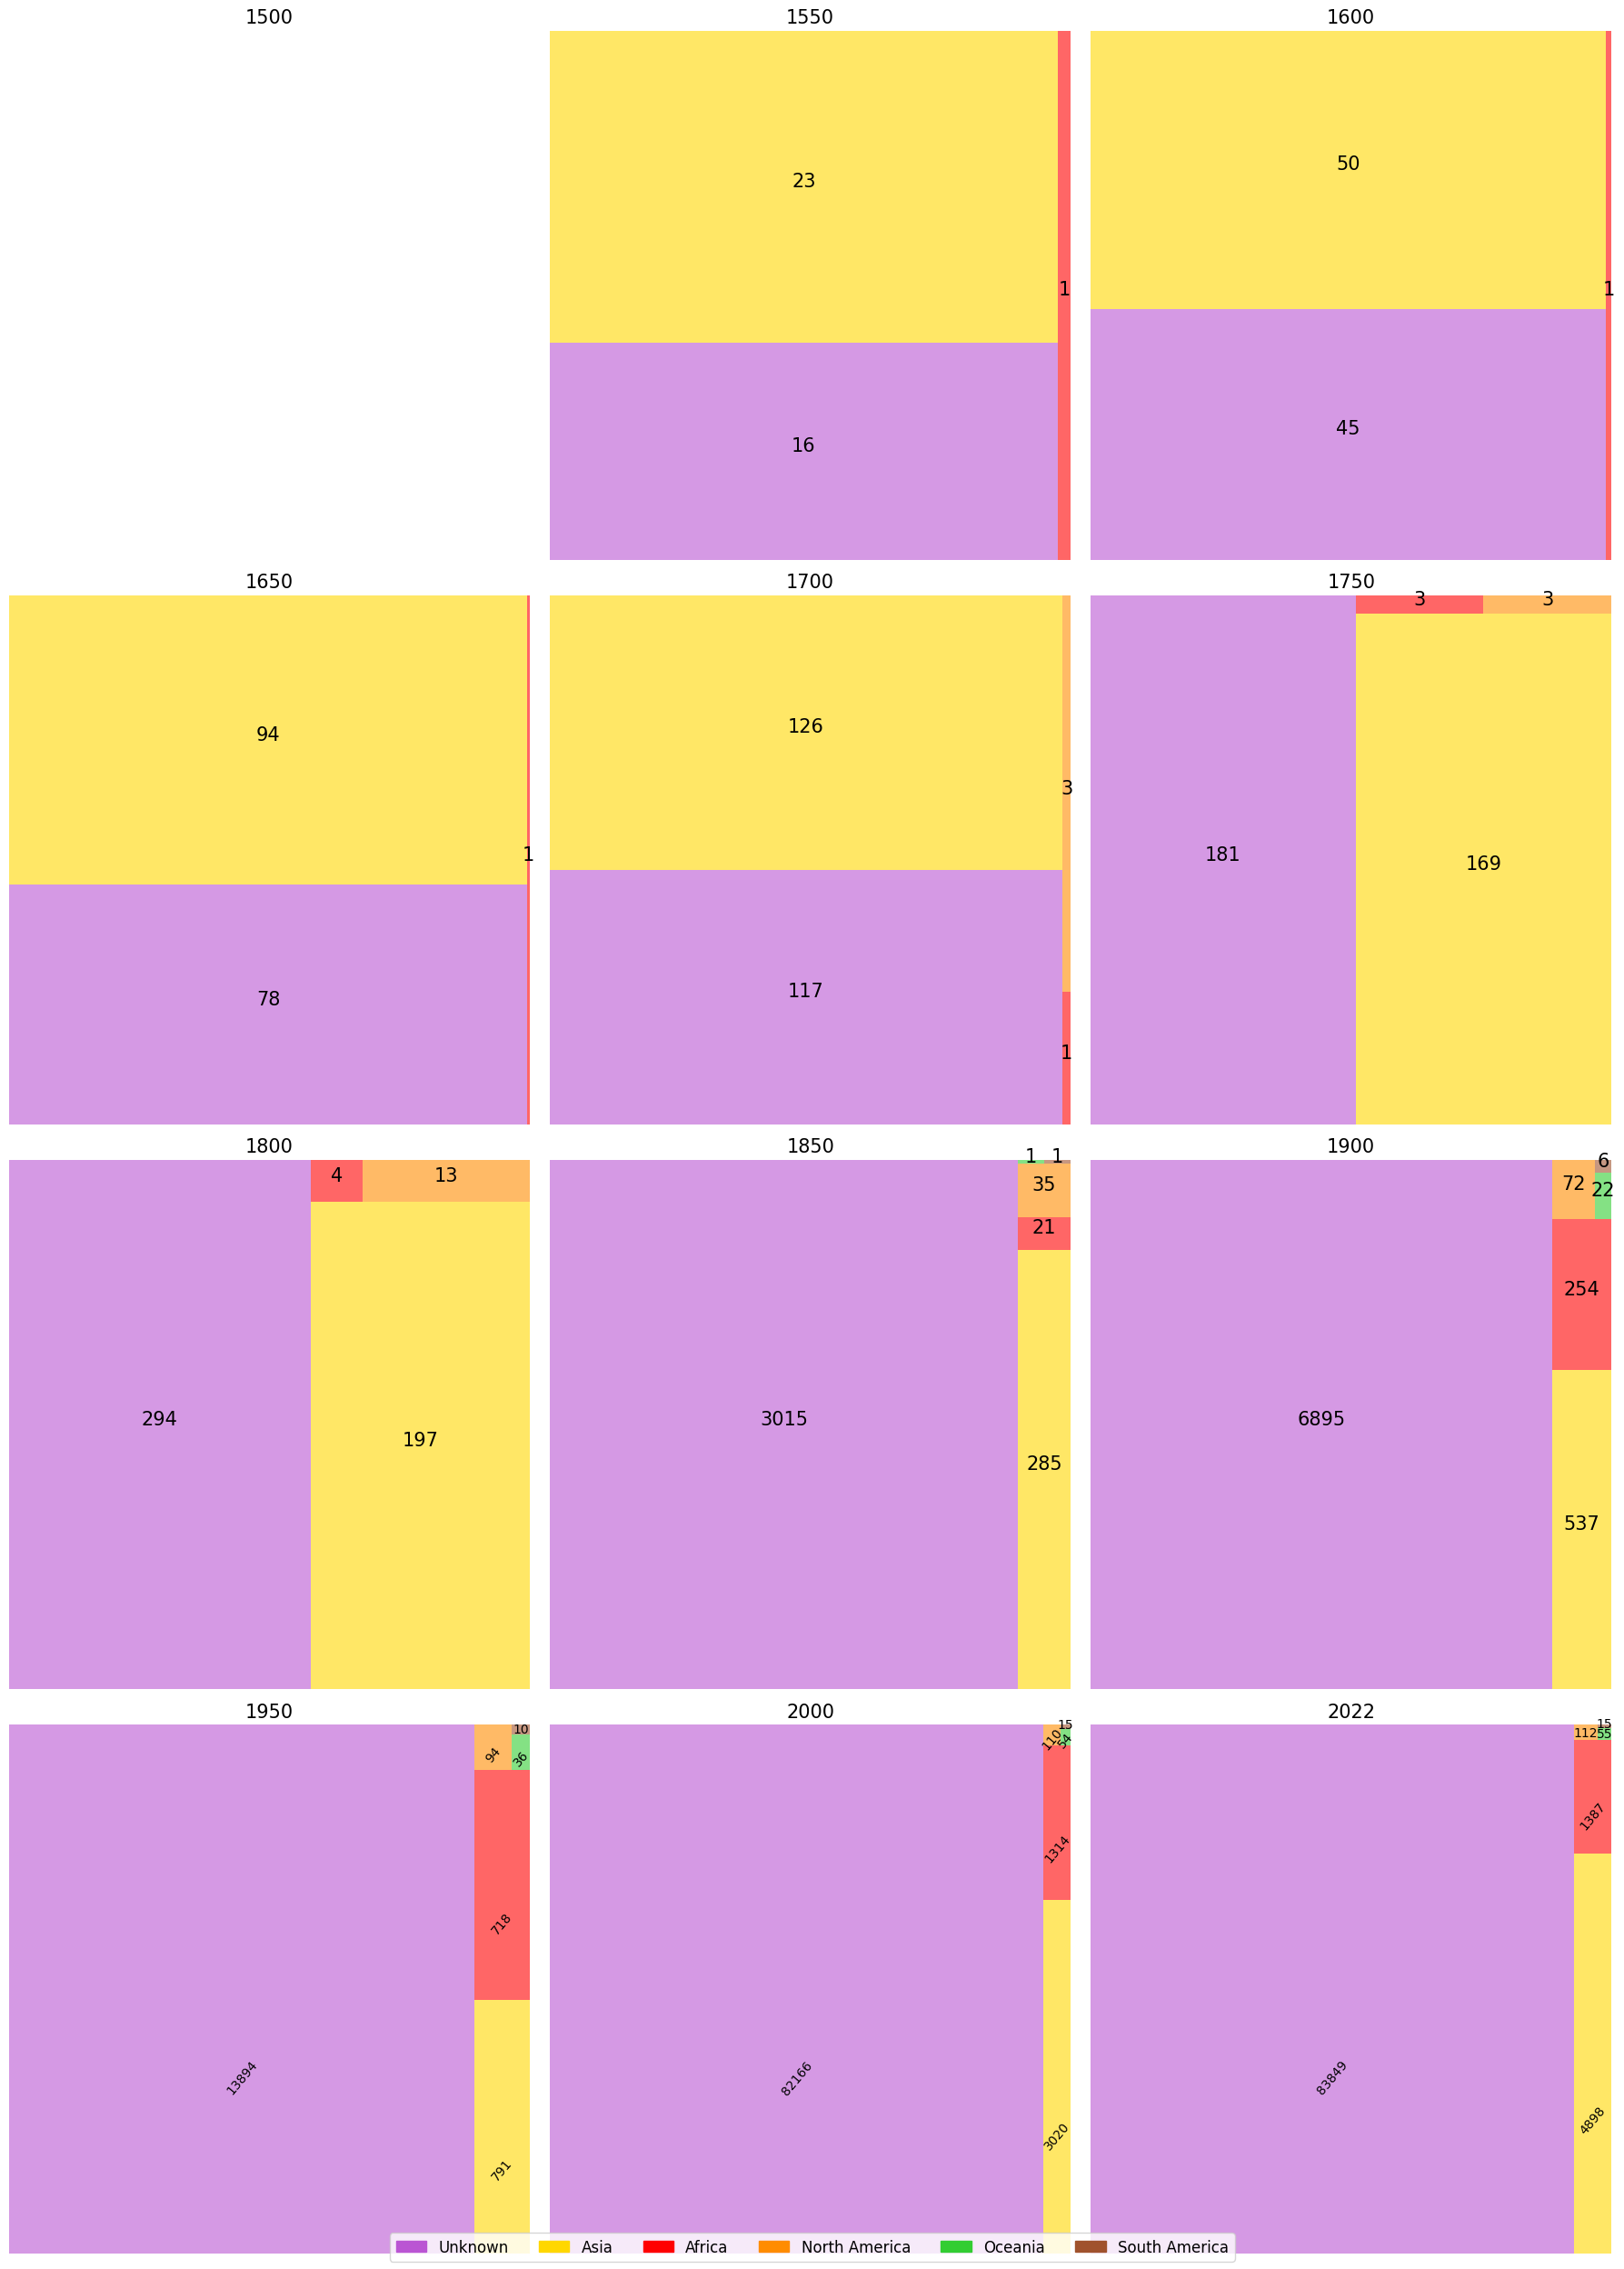

In [16]:
collections = certain_collections[:,1:] # The treemap only considers non-European languages 
import squarify

time_periods = ["1500", "1550", "1600", "1650", "1700",
                "1750", "1800", "1850", "1900", "1950",
                "2000", "2022"]

continents = ["Asia", "Africa", "North America", "Oceania", "South America", "Unknown"]

fig, axes = plt.subplots(4, 3, figsize=(18, 25))  # Adjust for the number of time periods
axes = axes.flatten()


for i, ax in enumerate(axes):
    if i >= len(time_periods):
        ax.axis('off')  # Hide axes that aren't used
        continue

    period_data = collections[i]
    sizes = period_data[period_data > 0]  # Filter out zeros to avoid plotting them
    labels = [continents[j] for j in range(len(sizes))]
    # colors = plt.cm.tab20c(np.linspace(0, 1, len(sizes)))  # Colormap for different continents
    colors = ['mediumorchid', 'gold', 'red', 'darkorange', 'limegreen', 'sienna']  # Colors respectively represent Unknown, Asia, Africa, North America, Oceania, South America

    # Plot the treemap
    squarify.plot(sizes=sizes, color=colors, ax=ax, alpha=0.6)

    # Here we adjust the texts manually
    for patch, label, size in zip(ax.patches, labels, sizes):
        
        x, y, dx, dy = patch.get_x(), patch.get_y(), patch.get_width(), patch.get_height()

        if i <= 8:
                # If the bar is taller than it is wide, place the text vertically
                rotation = 0    
    
                # Place the text in the center of the rectangle, rotated as needed
                ax.text(x + dx/2, y + dy/2, size, ha='center', va='baseline', fontsize=15,
                    rotation=rotation)

        else:
        
        
            # Determine if the label will rotate within the rectangle
            if (dx < dy):
                
                # If the bar is wider than it is tall, place the text horizontally
                rotation = 50
        
                # Place the text in the center of the rectangle, rotated as needed
                ax.text(x + dx/2, y + dy/3, size, ha='center', va='center', fontsize=10,
                    rotation=rotation)
            
            else:
                
                rotation = 0    
        
                # Place the text in the center of the rectangle, rotated as needed
                ax.text(x + dx/2, y + dy/5, size, ha='center', va='baseline', fontsize=10,
                        rotation=rotation)

    ax.set_title(time_periods[i], fontsize = 15)
    ax.axis('off')


# Define the legend
legend_labels = {
    'mediumorchid': 'Unknown',
    'gold': 'Asia',
    'red': 'Africa',
    'darkorange': 'North America',
    'limegreen': 'Oceania',
    'sienna': 'South America'
}

# Create a list of patches for the legend
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]

# Place the legend on the figure
fig.legend(handles=legend_patches, loc='lower center', ncol=len(legend_patches), fontsize='large')

# Adjust the layout to make room for the legend
plt.subplots_adjust(bottom=0.1)  # Adjust the bottom to have enough space for the legend

plt.tight_layout()
plt.savefig('certain_language_distribution.png')
plt.show()

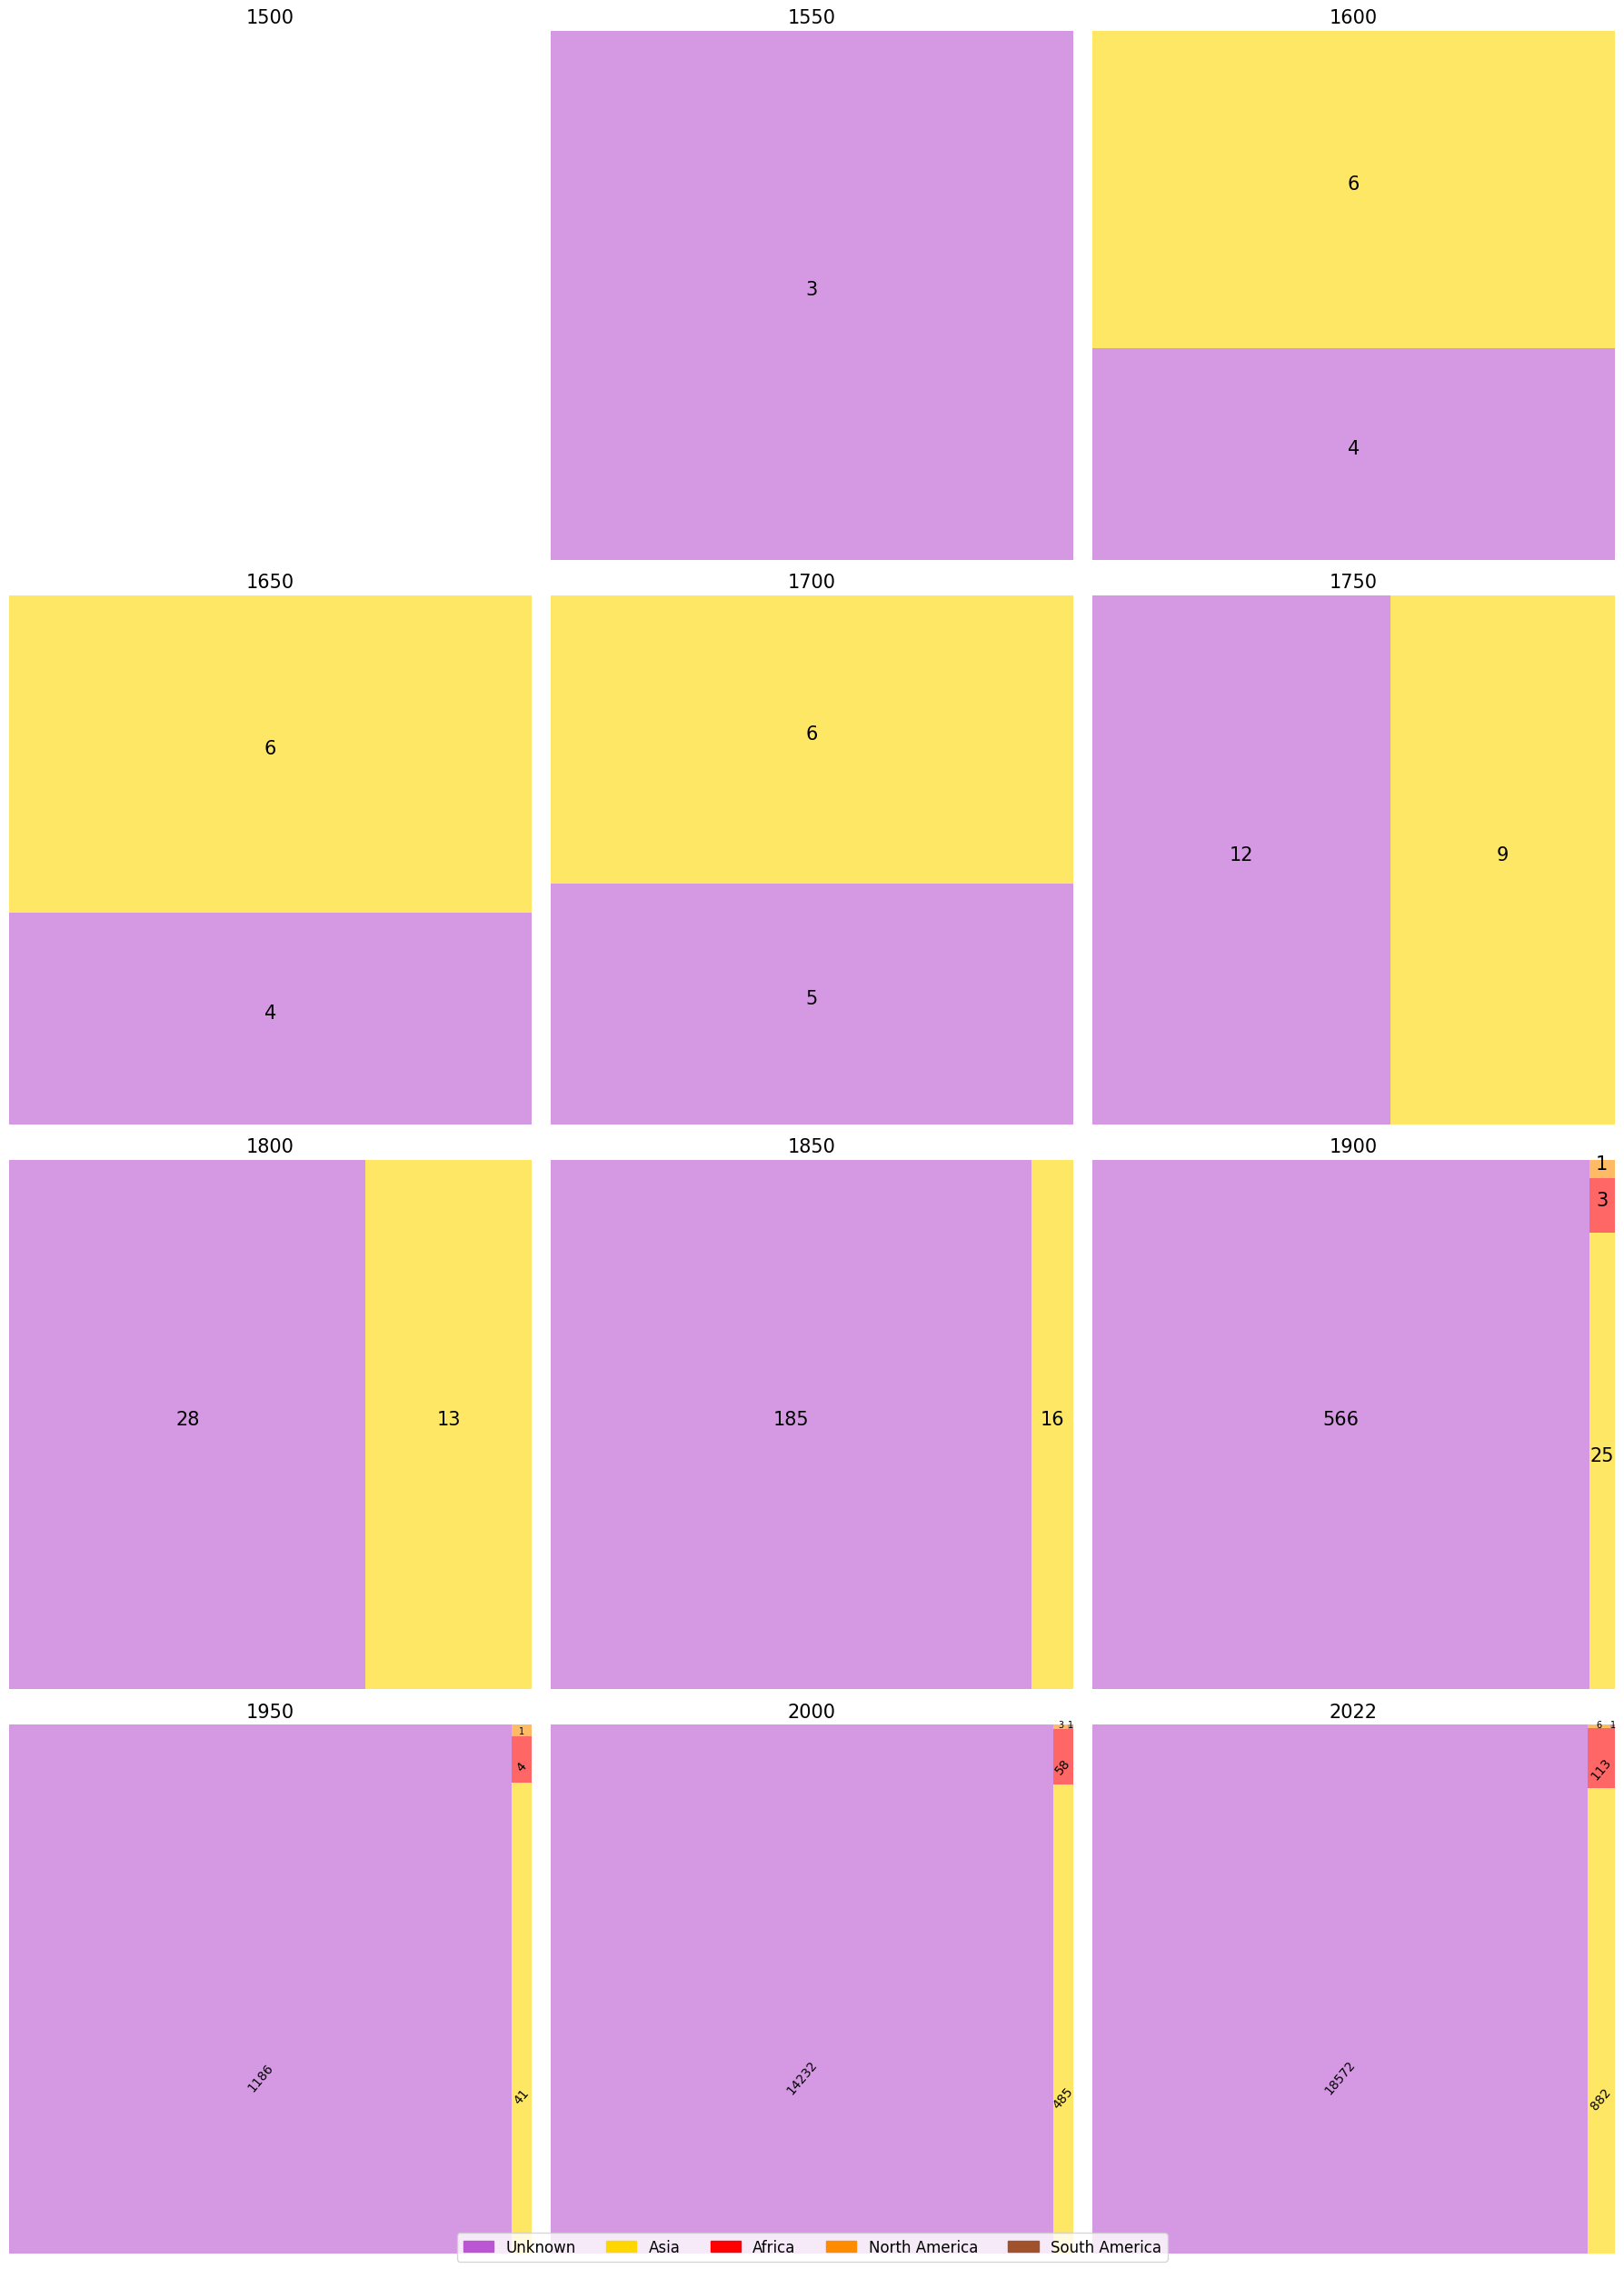

In [17]:
collections = clear_uncertain_collections[:,1:] # The treemap only considers non-European languages 
import squarify

time_periods = ["1500", "1550", "1600", "1650", "1700",
                "1750", "1800", "1850", "1900", "1950",
                "2000", "2022"]

continents = ["Asia", "Africa", "North America", "Oceania", "South America", "Unknown"]

fig, axes = plt.subplots(4, 3, figsize=(18, 25))  # Adjust for the number of time periods
axes = axes.flatten()


for i, ax in enumerate(axes):
    if i >= len(time_periods):
        ax.axis('off')  # Hide axes that aren't used
        continue

    period_data = collections[i]
    sizes = period_data[period_data > 0]  # Filter out zeros to avoid plotting them
    labels = [continents[j] for j in range(len(sizes))]
    
    colors = ['mediumorchid', 'gold', 'red', 'darkorange', 'sienna']  # Colors respectively represent Unknown, Asia, Africa, North America, South America

    # Plot the treemap
    squarify.plot(sizes=sizes, color=colors, ax=ax, alpha=0.6)

    # Here we adjust the texts manually
    for patch, label, size in zip(ax.patches, labels, sizes):
        
        x, y, dx, dy = patch.get_x(), patch.get_y(), patch.get_width(), patch.get_height()

        if i <= 8:
                # If the bar is taller than it is wide, place the text vertically
                rotation = 0    
    
                # Place the text in the center of the rectangle, rotated as needed
                ax.text(x + dx/2, y + dy/2, size, ha='center', va='baseline', fontsize=15,
                    rotation=rotation)

        else:
        
        
            # Determine if the label will rotate within the rectangle
            if (dx < dy):
                
                # If the bar is wider than it is tall, place the text horizontally
                rotation = 50
        
                # Place the text in the center of the rectangle, rotated as needed
                ax.text(x + dx/2, y + dy/3, size, ha='center', va='center', fontsize=10,
                    rotation=rotation)
            
            else:
                
                rotation = 0    
        
                # Place the text in the center of the rectangle, rotated as needed
                ax.text(x + dx/2, y + dy/5, size, ha='center', va='baseline', fontsize=7,
                        rotation=rotation)

    ax.set_title(time_periods[i], fontsize = 15)
    ax.axis('off')


# Define the legend
legend_labels = {
    'mediumorchid': 'Unknown',
    'gold': 'Asia',
    'red': 'Africa',
    'darkorange': 'North America',
    'sienna': 'South America'
}

# Create a list of patches for the legend
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]

# Place the legend on the figure
fig.legend(handles=legend_patches, loc='lower center', ncol=len(legend_patches), fontsize='large')

# Adjust the layout to make room for the legend
plt.subplots_adjust(bottom=0.1)  # Adjust the bottom to have enough space for the legend

plt.tight_layout()
plt.savefig('clear_uncertain_language_distribution.png')
plt.show()

In [18]:
# collections = unk_asia.T

# y_min_slider = widgets.FloatSlider(value=0, min=0, max=np.max(np.sum(unk_asia, axis=1)), description='Y min:', continuous_update=True)
# y_max_slider = widgets.FloatSlider(value=np.max(np.sum(unk_asia, axis=1)), min=0, max=np.max(np.sum(unk_asia, axis=1)), description='Y max:', continuous_update=True)

# interactive_plot = widgets.interactive(plot_stackplot, x_min=x_min_slider, x_max=x_max_slider, y_min=y_min_slider, y_max=y_max_slider)

# # Display the interactive plot
# display(interactive_plot)

# Publication Type Preprocessing

In [19]:
import re

def split_words_in_list(words_list):
    result = []
    for text in words_list:
        # Split the text based on spaces or transitions from lowercase to uppercase
        words = re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?=[A-Z]|$)', text)
        result.append(words)
    return result

unique_types = unique_types[np.logical_not(np.equal(unique_types, None))]
cleaned_unique_types = split_words_in_list(unique_types)

NameError: name 'unique_types' is not defined

In [ ]:
def categorize_data(processed_words_list, book_keywords, academic_keywords, 
                    audio_keywords, art_keywords, computer_keywords, data_keywords):
    categorized_data = {}
    for entry in processed_words_list:
        is_academic = any(word.lower() in academic_keywords or any(keyword.lower() in word.lower() for keyword in academic_keywords) for word in entry)
        if is_academic:
            categorized_data[' '.join(entry)] = 'academic'
        else:
            is_recording = any(word.lower() in audio_keywords or any(keyword.lower() in word.lower() for keyword in audio_keywords) for word in entry)
            if is_recording:
                categorized_data[' '.join(entry)] = 'recording'
            else:
                is_art = any(word.lower() in art_keywords or any(keyword.lower() in word.lower() for keyword in art_keywords) for word in entry)
                if is_art:
                    categorized_data[' '.join(entry)] = 'art'
                else:
                    is_computer = any(word.lower() in computer_keywords or any(keyword.lower() in word.lower() for keyword in computer_keywords) for word in entry)
                    if is_computer:
                        categorized_data[' '.join(entry)] = 'computer'
                    else:
                        is_data = any(word.lower() in book_keywords or any(keyword.lower() in word.lower() for keyword in data_keywords) for word in entry)
                        if is_data:
                            categorized_data[' '.join(entry)] = 'data'
                        else:    
                            is_book = any(word.lower() in book_keywords or any(keyword.lower() in word.lower() for keyword in book_keywords) for word in entry)
                            if is_book:
                                categorized_data[' '.join(entry)] = 'book'
                            else:
                                categorized_data[' '.join(entry)] = 'unknown'
    
    return categorized_data

# Example keywords related to books
book_keywords = [
    "book", "story", "stories", "fiction", "biography", "tale", "interpretation",
    "journal", "broadside", "proclamation", "read", "translation", "almanac", 'Brtoadsides',
    "periodi", "newspaper", "magazine","novel", "print", "text", "poetry", "poem","poezja", "sonnet","humor", "guide", "eriodical",
    "memoir", "manual", "encyclopedia", "dictionar","recipe", "binding", "publica", "publish", "newsletter", "writing", "constitution"
]

academic_keywords = [
    "paper", "proceeding", "dissertation", "academic", "conference", "thesis", "annotation", "presentation", "sample", "proof", "guildeline", "treaties",
     "exam", "guide", "law", "essay", "manuscript", "studies", "report", "literature", "quotation", "teach", "theory", "anecdote", "archive", "review", "reference", "outline",
    "literary", "document", "bibliograph","criticism", "lecture", "abstracts", "survey", "work", "exam","problem", "question", "grammar","histor", "scientific"
]

audio_keywords = ["song","sing","music","recording", "recorded","score","sound","audio", "symphon", "sonata","anthem","opera","rhyme","ballad","folklore", "speech",
                  "narrat","commenta", "radio", "jazz", "concert","film","video", "dialog", "interview"]

art_keywords = ["art","sculpture","paint","draw","theatre","theater","play","drama", "advertise", "portrait",
                "picture", "pictorial", "image","photo", "cartoon", "comic","manga", "poster", "lyric", "color", "game"]


computer_keywords = ["software","computer", "http", "internet", "disc", "disk","code",
                     "web", "program", "database","electronic", "online", "Elektronische"]

data_keywords = ["map", "statisti", "chart", "graph", "atlas", "sheet", "address",
                 "directory", "directories", "list","catalog","collection","form" ]

# Apply categorization function to the processed words list
categorized_data = categorize_data(cleaned_unique_types, book_keywords, academic_keywords,
                                   audio_keywords, art_keywords, computer_keywords, data_keywords)


# Get the number of items with the value of "unknown"
unknown_count = sum(1 for category in categorized_data.values() if category == 'unknown')

print("Number of items with value 'unknown':", unknown_count)

In [ ]:
# unknown_keys = [key for key, value in categorized_data.items() if value == 'unknown']

# unknown_keys